# Analyzing Factors Influencing Musician Artist Popularity

## 1. Aims, objectives and background

### 1.1 Introduction

In today's dynamic and interconnected world, the music industry has undergone a profound transformation in how musicians navigate their path to popularity. With the rise of online platforms, streaming services, and social media, musicians now have incredible chances to reach global audiences, connect with fans, and skyrocket their careers. But in this rapidly changing landscape, it's crucial to understand the factors that make musician artists popular.

Music and its industry have kept my attention throughout my life, and the question of what makes someone succeed in the field has been on my mind for as long as I can remember.

This study aims to dig deep into the factors that influence the popularity of musician artists, helping us to understand what may help them rise to the top. By diving into this phenomenon, we can gain valuable insights into what makes musicians successful across different music genres,  backgrounds, and parts of the world.

To help our discovery, this study will use the [Music Artist Popularity dataset by Piotr](https://www.kaggle.com/datasets/pieca111/music-artists-popularity). By digging into these data, we can get a better picture of how all these different factors interact and shape the destiny of musicians.

### 1.2 Aims and objectives

Within this project, the following areas will be explored:
1. To examine the influence of different music genres on artist popularity and understand the relationship between genre preference and audience engagement.
2. To investigate the impact of the artist's country or region on their popularity, aiming to identify any regional trends or preferences that contribute to artist success.
3. To explore the correlation between the number of scrobbles and the music genre, understanding which genres have a major facility in obtaining attention.

For this project proposal, my aims are to:
1. Collect relevant data through web scraping and organize it for cleaning and analysis.
2. Clean and transform the collected data to make it suitable for analysis.
3. Perform exploratory data analysis to identify significant trends and patterns for further investigation.

### 1.3 Data
#### 1.3.1 About the dataset
For this study on the factors influencing musician popularity, we utilized the ["Music Artists Popularity" dataset](https://www.kaggle.com/datasets/pieca111/music-artists-popularity) sourced from Kaggle. This dataset incorporates data from [MusicBrainz](https://musicbrainz.org/), a collaborative music database with a userbase of approximately 250,000 active users and over 20 years of existence, as well as [Last.fm](https://www.last.fm/), a renowned website also with over 20 years of existence and a comprehensive music database. Both databases provide valuable information such as artist names, countries, and tags. The dataset used in this study contains 1,466,083 rows and 10 columns.
I picked this dataset because it has trustworthy sources and pretty much has all the information we need. The less significant rows (less popular artists) have been cut from the dataset file so that it meets the allowed file size.

#### 1.3.2 Dataset flaws
The dataset description mentions that the "tags_lastfm" column from [Last.fm](https://www.last.fm/) contains tags created by users. These tags can sometimes be incorrect, not very serious, or even vulgar. Additionally, since there is no genre column in the dataset, we will need to figure out a solution for that later on.

[Last.fm](https://www.last.fm/) faces a challenge when multiple artists share the same profile page because they have the same name. This makes it hard to determine how many listeners and scrobbles should be assigned to each specific artist.

#### 1.3.3 Authorship
The dataset is owned by [Piotr Patrzyk](https://www.patrzyk.me/), with the top contributors (excluding Piotr) being [Federico Urena](https://www.kaggle.com/federicourena) and [Bionca B.](https://www.kaggle.com/bioncab)

### 1.4 Ethical considerations
#### 1.4.1 Use of the dataset
The dataset license allows me the following freedoms:
- I am free to share, copy, and redistribute the material in any medium or format.
- I can adapt, remix, transform, and build upon the material for any purpose, including commercial use.

The licensor cannot revoke these freedoms as long as I comply with the license terms, which are as follows:
- Attribution: I must give appropriate credit to the licensor, provide a link to the license, and indicate if any changes were made. I can do this in a reasonable manner, but not in a way that suggests the licensor endorses me or my use.
- ShareAlike: If I remix, transform, or build upon the material, I must distribute my contributions under the same license as the original material.
- No additional restrictions: I may not impose legal terms or technological measures that restrict others from doing anything the license permits.

This license does not apply to elements of the material in the public domain or situations where my use is permitted by an applicable exception or limitation.

#### 1.4.2 Use of the articles
Later in this research, we'll be web scraping information from [Hypebot](https://www.hypebot.com/), [Vanity Fair](https://www.vanityfair.com/), and [Wikipedia](https://www.wikipedia.org/).

**1.4.2.1 Wikipedia**<br>
[Wikipedia](https://www.wikipedia.org/)'s text content can be used under the terms of the [Creative Commons Attribution Share-Alike license (CC-BY-SA)](). According to it, I am required to provide credit to the authors, it can be done by including a hyperlink or URL, an alternative online copy that conforms to the license and provides proper credit, or a list of all authors.

**1.4.2.2 Vanity Fair**<br>
All I could find about the usage of content from [Vanity Fair](https://www.vanityfair.com/) is written in its [User Agreement's Rules of Usage](https://www.condenast.com/user-agreement#rules-of-usage).
It says that the products are intended for personal, non-commercial use only. But it does not specifically address the use of the products for college projects.
Because of that, I'll be providing proper credit to the author and add a link to the original article.

**1.4.2.3 Hypebot**<br>
[Hypebot](https://www.hypebot.com/)'s website doesn't include any terms and conditions section, and I couldn't find anything related telling about the use of content.
Because of that, I'll be providing proper credit to the author and add a link to the original article.


# 2 Web scraping 
Gathering data from online articles will help us to reinforce our conclusions about what makes popular musicians successful. In this topic, we'll use web scraping to gather data for later use.

### 2.0.1 Defining scraping function
Let's create a function to get and parse the webpage html, and also handle any unexpected errors that may occur. 

In [229]:
import requests
from bs4 import BeautifulSoup

def getParsedWebpage(url):
    # send a GET request to the URL
    response = requests.get(url)

    # if status code is different from success status code, return 'error' 
    if response.status_code != 200:
        soup = 'error'
    else:
        # parse the HTML content 
        soup = BeautifulSoup(response.content, 'html.parser')
        
    return soup

## 2.1 Top 10 music markets
Hypebot's have an [interesting article](https://www.hypebot.com/hypebot/2023/04/what-are-the-worlds-top-10-music-markets.html) about the world's top 10 music markets, based on the IFPI Global Music Report in 2022. We'll scrape the first list on the page, which contains the exact data we need for our analysis.

In [230]:


_url = "https://www.hypebot.com/hypebot/2023/04/what-are-the-worlds-top-10-music-markets.html"

_soup = getParsedWebpage(_url)

# search for the first <ol> in the content
_ordered_list = _soup.find("ol")

# find all the <li> elements within the container
_list_items = _ordered_list.find_all("li")

# extract the text from the <li> elements
_data = [bullet_point.get_text(strip=True) for bullet_point in _list_items]

top_music_markets = []

# enumerate the list items and inserts them in a list of tuples
# each tuple contains the list item position and its content
for position, item in enumerate(_data, start=1):
    top_music_markets.append((position, item))

print(top_music_markets)

[(1, 'USA'), (2, 'Japan'), (3, 'UK'), (4, 'Germany'), (5, 'China'), (6, 'France'), (7, 'South Korea'), (8, 'Canada'), (9, 'Brazil'), (10, 'Australia')]


## 2.2 The British Invasion
Later in this research, we'll need information about The British Invasion, an event that occurred in the last century.
We will store all the content in a dict for better organization.

### 2.2.1 "The British Invasion" – Vanity Fair
We'll use the introductory paragraph from ["The British Invasion"](https://www.vanityfair.com/culture/2002/11/british-invasion-oral-history#:~:text=On%20February%207%20the%20Beatles,known%20as%20the%20British%20Invasion) by [David Kamp](https://en.wikipedia.org/w/index.php?title=British_Invasion&action=history) in Vanity Fair.

In [231]:
_url = "https://www.vanityfair.com/culture/2002/11/british-invasion-oral-history#:~:text=On%20February%207%20the%20Beatles,known%20as%20the%20British%20Invasion"

_soup = getParsedWebpage(_url)
# find the first <div> that belongs to body__inner-container class
_div = _soup.find("div", class_="body__inner-container")
# find the first <p> tag inside the div
_paragraph = _div.find("p")
# get the content
_vanity_fair_paragraph = _paragraph.get_text()

british_invasion_data = {"vanity_fair": _vanity_fair_paragraph}

print(british_invasion_data["vanity_fair"])

This much is familiar: On January 25, 1964, the Beatles’ single “I Want to Hold Your Hand” entered the American Top 40. On February 1 it reached No. 1. On February 7 the Beatles arrived in New York for their inaugural U.S. visit, and two days later played on The Ed Sullivan Show to hysterical response and record viewership, thereby effecting a cataclysmic cultural shift and triggering a musical movement that would come to be known as the British Invasion. Cue screaming girls, fringe haircuts, Murray the K, etc.


## 2.2.2 "British Invasion" – Wikipedia

We'll also use the introductory paragraph from ["British Invasion"](https://en.wikipedia.org/wiki/British_Invasion), first written by [Vague Rant](https://en.wikipedia.org/wiki/British_Invasion) in Wikipedia. 

In [232]:
_url = "https://en.wikipedia.org/wiki/British_Invasion#cite_note-6"

_soup = getParsedWebpage(_url)
# find the first <div> that belongs to mw-parser-output class
_div = _soup.find("div", class_="mw-parser-output")
# find all the <p> tags inside the div
_p_tags = _div.find_all("p")
# since the target has no class or id, select the second element in the list
_wikipedia_paragraph = _p_tags[1].get_text()

british_invasion_data['wikipedia'] = _wikipedia_paragraph

print(british_invasion_data['wikipedia'])

The British Invasion was a cultural phenomenon of the mid-1960s, when rock and pop music acts from the United Kingdom[2] and other aspects of British culture became popular in the United States and significant to the rising "counterculture" on both sides of the Atlantic Ocean.[3] UK pop and rock groups such as the Beatles, the Rolling Stones, the Zombies, the Kinks,[4] Small Faces, the Dave Clark Five,[5] Herman's Hermits, the Hollies, the Animals, Gerry and the Pacemakers, the Searchers, the Yardbirds, the Who and Them, as well as solo singers such as Dusty Springfield, Cilla Black, Petula Clark, Tom Jones and Donovan, were at the forefront of the "invasion".[6]



# 3 Data cleaning and processing

The dataset needs to be cleaned; specifically, this entails:
- removing duplicates in artists,
- establishing single country of origin,
- establishing single genre from list of tags.


## 3.1 Duplicated artist names

Due to the fact that [Last.fm](https://www.last.fm/) does dot disambiguate between different artists that have the same name, the dataset contains some artists with duplicated listeners/scrobbles count. Gracefully, the CSV file have a "ambiguous_artist" column containing a boolean value to indicate if more than one artist shares the same last.fm page.<br><br>
We'll just grab the top 1000 popular artists from the dataset. Since our focus is on popularity, we can ignore the less popular entries and it'll help speed up the processing too.

In [249]:
import pandas as pd

# load the dataset into a pandas DataFrame
df = pd.read_csv("dataset.csv")
# sort the values by the number of scrobbles in descending order
df.sort_values(by='scrobbles_lastfm', ascending=False, inplace=True)

# select the first 1000 rows
df = df.head(1000)
# filter the DataFrame for non-ambiguous artists
_non_ambiguous_artists_df = df[df['ambiguous_artist'] == False]
# select the artists with ambiguous_artist value equals true
_ambiguous_artists_df = df[df['ambiguous_artist'] == True]
# Group by artist_lastfm and aggregate the required columns by selecting the first row
_collapsed_df = _ambiguous_artists_df.groupby('artist_lastfm').agg({'mbid': 'first', 'artist_mb': 'first', 'country_mb': 'first', 'country_lastfm': 'first', 'tags_mb': 'first', 'tags_lastfm' : 'first', 'listeners_lastfm': 'first', 'scrobbles_lastfm': 'first'}).reset_index()
# Merge the collapsed DataFrame with the original DataFrame, excluding the original ambiguous artists
df = pd.merge(_non_ambiguous_artists_df, _collapsed_df, how='left')

display(df)


,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,The Beatles,The Beatles,United Kingdom,United Kingdom,rock; pop; progressive rock; 80s; heavy metal;...,classic rock; rock; british; 60s; pop,3674017.0,517126254.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
3,9c9f1380-2516-4fc9-a3e6-f9f61941d090,Muse,Muse,United Kingdom,United Kingdom,rock; electronic; synthpop; alternative rock; ...,alternative rock; rock; alternative; Progressi...,4089612.0,344838631.0,False
4,ada7a83c-e3e1-40f1-93f9-3e73dbc9298a,Arctic Monkeys,Arctic Monkeys,United Kingdom,United Kingdom,alternative rock; british; uk; britannique; 20...,indie rock; indie; british; rock; alternative;...,3501680.0,332306552.0,False
...,...,...,...,...,...,...,...,...,...,...
898,83e59f23-3b0b-4304-834d-5bcafd5df6d2,Scooter,Scooter,Germany,Germany,rock; electronic; hardcore; rave; german; euro...,techno; dance; electronic; trance; happy hardc...,744433.0,19361001.0,False
899,37d0a847-32d3-480f-bd1e-101f50a3d332,Selena Gomez & The Scene,Selena Gomez & the Scene,United States,United States,pop; electropop; dance-pop; teen pop; contempo...,pop; female vocalists; pop rock; Disney; Selen...,987180.0,19293669.0,False
900,83998f9c-846b-4294-aede-d7735531c901,Edguy,Edguy,Germany,Germany,power metal; power-metal,Power metal; heavy metal; metal; german; melod...,346397.0,19280507.0,False
901,a0b2f210-cd3a-453d-937d-e4f2658d17c7,Girls Aloud,Girls Aloud,United Kingdom,United Kingdom,rock; pop; british; uk; electro rock; english;...,pop; british; female vocalists; dance; Girl Gr...,723845.0,19273570.0,False


## 3.2 Getting artist genre
The dataset doesn't have a genre column, but we can still find out the genre for each artist using the available tags. They tags associated with the artists usually include some genres their songs belong to. So, we'll create a genre column by picking the most popular tag that represents a music genre. If the top tag doesn't match a genre, we'll move on to the next popular tag, and so on. 

In [234]:
from collections import Counter


""" 
return the most recurring value in the list parameter that matches a value from _popular_genres list
if no value is matched, return None
"""
def _find_most_recurring_value(list):
    _popular_genres = ["pop", "rock", "hip-hop", "rap", "r&b", "soul", "electronic", "dance", "country", "jazz", "reggae", "classical", "alternative", "indie"]
    # get a list of tuple in which the first value is value and the second is the number of times this value appeared
    _value_counts = Counter(list)
    # sort the values so that the most recurring values goes first
    _sorted_values = sorted(_value_counts.items(), key=lambda x: x[1], reverse=True)
    
    for value, count in _sorted_values:
        if value in _popular_genres:
            return value
    return None

# transform the tags value from df to a list of strings
def _get_genres(tags):
    # separates the values using semi-colon as the separator character
    _values = str(tags).split(';')
    # removes the whitespaces
    _values = [string.replace(" ", "") for string in _values]
    return _find_most_recurring_value(_values)

# call _getgenres function to each element in 'tags_lastfm' column and add them into 'genre' column
df['genre'] = df['tags_lastfm'].apply(_get_genres)

# move the genre_column to the middle of the dataframe
_genre_column = df['genre']
df = df.drop(['genre'], axis=1)
df.insert(2, 'genre', _genre_column)

display(df)

,mbid,artist_mb,genre,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,The Beatles,rock,The Beatles,United Kingdom,United Kingdom,rock; pop; progressive rock; 80s; heavy metal;...,classic rock; rock; british; 60s; pop,3674017.0,517126254.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,alternative,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,rock,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
3,9c9f1380-2516-4fc9-a3e6-f9f61941d090,Muse,rock,Muse,United Kingdom,United Kingdom,rock; electronic; synthpop; alternative rock; ...,alternative rock; rock; alternative; Progressi...,4089612.0,344838631.0,False
4,ada7a83c-e3e1-40f1-93f9-3e73dbc9298a,Arctic Monkeys,indie,Arctic Monkeys,United Kingdom,United Kingdom,alternative rock; british; uk; britannique; 20...,indie rock; indie; british; rock; alternative;...,3501680.0,332306552.0,False
...,...,...,...,...,...,...,...,...,...,...,...
898,83e59f23-3b0b-4304-834d-5bcafd5df6d2,Scooter,dance,Scooter,Germany,Germany,rock; electronic; hardcore; rave; german; euro...,techno; dance; electronic; trance; happy hardc...,744433.0,19361001.0,False
899,37d0a847-32d3-480f-bd1e-101f50a3d332,Selena Gomez & The Scene,pop,Selena Gomez & the Scene,United States,United States,pop; electropop; dance-pop; teen pop; contempo...,pop; female vocalists; pop rock; Disney; Selen...,987180.0,19293669.0,False
900,83998f9c-846b-4294-aede-d7735531c901,Edguy,rock,Edguy,Germany,Germany,power metal; power-metal,Power metal; heavy metal; metal; german; melod...,346397.0,19280507.0,False
901,a0b2f210-cd3a-453d-937d-e4f2658d17c7,Girls Aloud,pop,Girls Aloud,United Kingdom,United Kingdom,rock; pop; british; uk; electro rock; english;...,pop; british; female vocalists; dance; Girl Gr...,723845.0,19273570.0,False


Note that we use a popular_genre list containing some of the most popular music genres to determine if the tag is a music genre or not.

## 3.3 Final details
Now that we killed the duplicated artists names and have their respective genres, it's time to remove the data that won't be relevant to our research or that is no longer necessary.
We'll remove the [MusicBrainz](https://musicbrainz.org/) id, [Last.fm](https://www.last.fm/) artist names, [Last.fm](https://www.last.fm/) country names, both tags, and the ambiguous artist booleans. . We'll still keep the artist and country names since they're essential, but we'll choose data from a single database to keep things clear.
We'll also rename the columns, we don't need to know its database origin anymore.

In [235]:
# remove irrelevant columns
df.drop(['mbid', 'artist_lastfm', 'country_lastfm', 'tags_mb', 'tags_lastfm', 'ambiguous_artist'], axis=1, inplace=True)
# rename the remaining columns
df.rename(columns={'artist_mb': 'Artist', 'genre': 'Genre', 'country_mb': 'Country','listeners_lastfm': 'Listeners', 'scrobbles_lastfm': 'Scrobbles'}, inplace=True)

display(df)

,Artist,Genre,Country,Listeners,Scrobbles
0,The Beatles,rock,United Kingdom,3674017.0,517126254.0
1,Radiohead,alternative,United Kingdom,4732528.0,499548797.0
2,Coldplay,rock,United Kingdom,5381567.0,360111850.0
3,Muse,rock,United Kingdom,4089612.0,344838631.0
4,Arctic Monkeys,indie,United Kingdom,3501680.0,332306552.0
...,...,...,...,...,...
898,Scooter,dance,Germany,744433.0,19361001.0
899,Selena Gomez & The Scene,pop,United States,987180.0,19293669.0
900,Edguy,rock,Germany,346397.0,19280507.0
901,Girls Aloud,pop,United Kingdom,723845.0,19273570.0


# 4 Exploratory data analysis


### 4.0.1 Scrobbles x listeners
Before we go ahead with our analysis, it's important to clarify the difference between the number of listeners and the number of scrobbles of a musician.
- Listeners: number of users who have listened to the musician.
- Scrobbles: number of times the artist's songs have been played.
Both contribute to a musician's popularity and it's hard to tell which one will be the best to use to our analysis. But I'll be mainly using the number of scrobbles since it indicates the actual consumption of an artist's track.

Because of it, let's sort our dataframe by the number of scrobbles in descending order. It will be useful for later purposes.

In [236]:
# sort the rows by scrobbles in descending order
df.sort_values(by='Scrobbles', ascending=False, inplace=True)
# reset the row indices
df.reset_index(drop=True, inplace=True)
display(df)

,Artist,Genre,Country,Listeners,Scrobbles
0,The Beatles,rock,United Kingdom,3674017.0,517126254.0
1,Radiohead,alternative,United Kingdom,4732528.0,499548797.0
2,Coldplay,rock,United Kingdom,5381567.0,360111850.0
3,Muse,rock,United Kingdom,4089612.0,344838631.0
4,Arctic Monkeys,indie,United Kingdom,3501680.0,332306552.0
...,...,...,...,...,...
898,Scooter,dance,Germany,744433.0,19361001.0
899,Selena Gomez & The Scene,pop,United States,987180.0,19293669.0
900,Edguy,rock,Germany,346397.0,19280507.0
901,Girls Aloud,pop,United Kingdom,723845.0,19273570.0


## 4.1 Scrobbles by Country: Pie Chart
The country where a musician comes from can greatly influence their success and popularity in the music industry.
Let's explore which countries have the highest number of scrobbles based on the sum of the scrobbles of the artists that belongs to the country. Visualizing this data using a pie chart will give us a clear picture of the distribution.

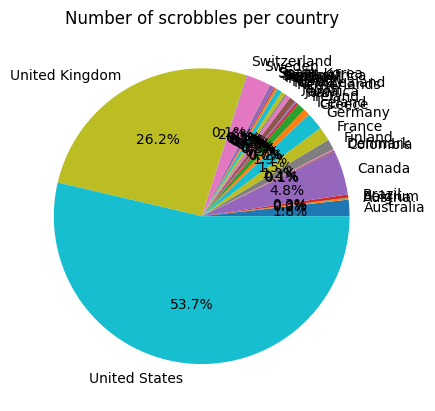

In [237]:
import matplotlib.pyplot as plt
# group the df by country and calculate the sum of Scrobbles for each of them
_country_scrobbles = df.groupby('Country')['Scrobbles'].sum()
# plot the pie chart
_country_scrobbles.plot.pie(autopct='%1.1f%%')

plt.axis('off')

plt.title('Number of scrobbles per country')

plt.show()

The pie chart confirms that the United States has the highest scrobbles, which makes sense as it's the biggest music market according to Hypebot's article that we web scrapped. However, it's interesting that the UK has more popular artists than Japan, despite market rankings. It shows that a big music market doesn't necessarily mean more scrobbles. Streaming popularity and cultural preferences play a role in these numbers.<br> Let's view the rank of world's greatest music markets according to [Hypebot](https://www.hypebot.com/hypebot/2023/04/what-are-the-worlds-top-10-music-markets.html).

In [238]:
# print the rank of top music markets
for (position, value) in top_music_markets:
    print(f"{position}. {value}")

1. USA
2. Japan
3. UK
4. Germany
5. China
6. France
7. South Korea
8. Canada
9. Brazil
10. Australia


## 4.2 Scrobbles x Listeners: Scatter plot

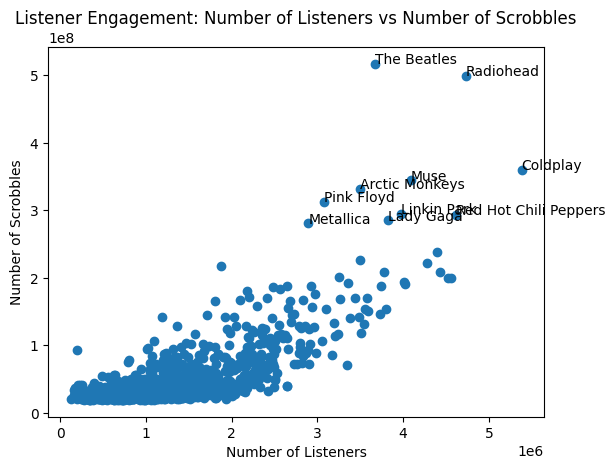

In [239]:
import numpy as np

# get data from columns in df
_artists = df['Artist']
_listeners = df['Listeners']
_scrobbles = df['Scrobbles']

# create the scatter plot
plt.scatter(_listeners, _scrobbles)

plt.xlabel('Number of Listeners')
plt.ylabel('Number of Scrobbles')
plt.title('Listener Engagement: Number of Listeners vs Number of Scrobbles')

# annotate artists names
for i, artist in enumerate(_artists):
    # annotate the name of only the most outstanding artists 
    if (_listeners[i] > 2500000 and _scrobbles[i] > 250000000):
        plt.annotate(artist, (_listeners[i], _scrobbles[i]))

plt.show()

We can visually observe the outliers here, while The Beatles is the one with highest scrobble, Coldplay is the winner when it comes to listeners, and Radiohead lies between both. It is curious to see that they are british, huh?

The scatter plot reveals interesting outliers. The Beatles lead in scrobbles, Coldplay in listeners, and Radiohead falls in between. Is it a coincidence that all three are British? That's what we'll see next.

### 4.2.1 UK vs USA
We already know that the highest number of scrobbles belongs to USA. However, the most popular artists are from the United Kingdom as we've seen in the scatter plot. It suggests that the USA may be the winner in terms of quantity of artists, but not in popularity per artist. To prove my suggestion, let's get the 100 artist with highest number of scrobbles and see how many belongs to those two countries.

In [240]:
# select the first 100 rows in df
_top_100_artists = df.head(100)
# select artists from uk
uk_artists = _top_100_artists[_top_100_artists['Country'] == 'United Kingdom']
# select artists from usa
usa_artists = _top_100_artists[_top_100_artists['Country'] == 'United States']
# print the amount of artists from both countries
print(f"UK: {uk_artists.shape[0]}")
print(f"USA: {usa_artists.shape[0]}")

UK: 26
USA: 62


Now, let's create another scatter plot, but this time only containing the artists present in the top 100 from the two countries.

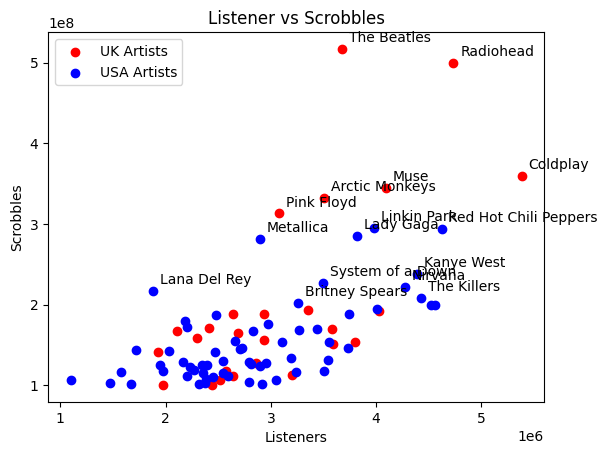

In [241]:
# create a scatter plot for uk artists
plt.scatter(uk_artists['Listeners'], uk_artists['Scrobbles'], color='red', label='UK Artists')
# create a scatter plot for USA artists
plt.scatter(usa_artists['Listeners'], usa_artists['Scrobbles'], color='blue', label='USA Artists')
# annotate the uk artists names
for x, y, artist in zip(uk_artists['Listeners'], uk_artists['Scrobbles'], uk_artists['Artist']):
    # annotate the name of only the most outstanding artists 
    if (y > 200000000):
        plt.annotate(artist, (x, y), textcoords="offset points", xytext=(5,5), ha='left')
# annotate the usa artists names
for x, y, artist in zip(usa_artists['Listeners'], usa_artists['Scrobbles'], usa_artists['Artist']):
    # annotate the name of only the most outstanding artists 
    if (y > 200000000):
        plt.annotate(artist, (x, y), textcoords="offset points", xytext=(5,5), ha='left')

plt.xlabel('Listeners')
plt.ylabel('Scrobbles')
plt.title('Listener vs Scrobbles')

# add legend
plt.legend()

plt.show()

As we can see, all the furthest points belongs to UK artists. Although there are various USA artists that are also relatively far from the mess at the bottom, like Metallica, Lady Gaga, Linkin Park, RHCP, and others.<br><br> So, what makes British artists stay at the top? This questions cannot be answered with graphs and datasets, but with history.<br> It's mainly due to an historical event called *The British Invasion*, but rather than explaining it myself, I will use two paragraphs of articles I web scraped earlier.<br> Let's start by seeing what it is through the [Wikipedia's article paragraph](https://en.wikipedia.org/wiki/British_Invasion):

In [242]:
print(british_invasion_data['wikipedia'])

The British Invasion was a cultural phenomenon of the mid-1960s, when rock and pop music acts from the United Kingdom[2] and other aspects of British culture became popular in the United States and significant to the rising "counterculture" on both sides of the Atlantic Ocean.[3] UK pop and rock groups such as the Beatles, the Rolling Stones, the Zombies, the Kinks,[4] Small Faces, the Dave Clark Five,[5] Herman's Hermits, the Hollies, the Animals, Gerry and the Pacemakers, the Searchers, the Yardbirds, the Who and Them, as well as solo singers such as Dusty Springfield, Cilla Black, Petula Clark, Tom Jones and Donovan, were at the forefront of the "invasion".[6]



This phenomenon occurred not because of one isolated event, but because of many, as this paragraph from [Vanity Fair's article](https://www.vanityfair.com/culture/2002/11/british-invasion-oral-history#:~:text=On%20February%207%20the%20Beatles,known%20as%20the%20British%20Invasion) tells us:

In [243]:
print(british_invasion_data['vanity_fair'])

This much is familiar: On January 25, 1964, the Beatles’ single “I Want to Hold Your Hand” entered the American Top 40. On February 1 it reached No. 1. On February 7 the Beatles arrived in New York for their inaugural U.S. visit, and two days later played on The Ed Sullivan Show to hysterical response and record viewership, thereby effecting a cataclysmic cultural shift and triggering a musical movement that would come to be known as the British Invasion. Cue screaming girls, fringe haircuts, Murray the K, etc.


Thus, we can tell that the USA music market is larger, leading to a higher number of popular artists. However, due to cultural and historical factors, including The British Invasion, UK haves the most outstanding and enduringly popular artists until this moment.

## 4.3 Genre x Scrobbles: Bar Graph and Pie Chart
Enough of nacionalities! It's also important analyze which music genres are the most popular.<br> Let's plot a bar graph of Genre x Scrobbles:

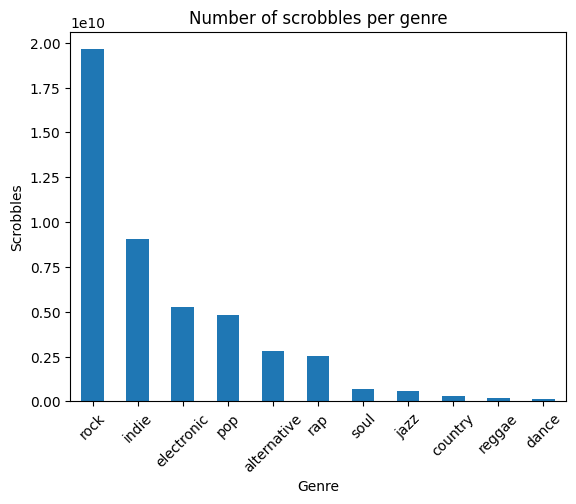

In [244]:
# sum the scrobbles of all the artists belonging to each genre and group into genre_scrobbles
genre_scrobbles = df.groupby('Genre')['Scrobbles'].sum()
# sort in descending order
genre_scrobbles.sort_values(ascending=False, inplace=True)
# plot bar graph
genre_scrobbles.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Scrobbles')
plt.title('Number of scrobbles per genre')
plt.xticks(rotation=45)
plt.show()

We can even plot a pie chart using the same data:

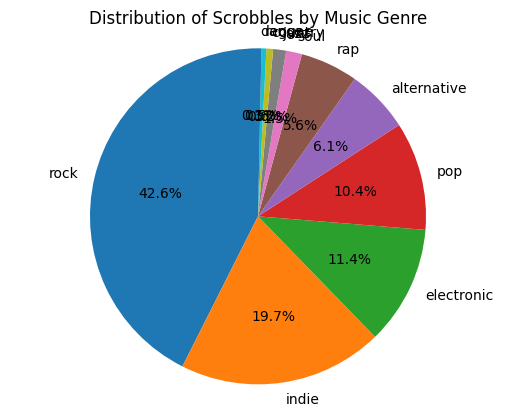

In [245]:
genre_scrobbles.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Scrobbles by Music Genre')
plt.ylabel('')
plt.show()

The two graphs tell us something: rock is the most popular genre. It makes sense since 7 of the top 10 most famous artists play rock music.

In [246]:
display(df.head(10))

,Artist,Genre,Country,Listeners,Scrobbles
0,The Beatles,rock,United Kingdom,3674017.0,517126254.0
1,Radiohead,alternative,United Kingdom,4732528.0,499548797.0
2,Coldplay,rock,United Kingdom,5381567.0,360111850.0
3,Muse,rock,United Kingdom,4089612.0,344838631.0
4,Arctic Monkeys,indie,United Kingdom,3501680.0,332306552.0
5,Pink Floyd,rock,United Kingdom,3081313.0,313236119.0
6,Linkin Park,rock,United States,3978390.0,294986508.0
7,Red Hot Chili Peppers,rock,United States,4620835.0,293784041.0
8,Lady Gaga,pop,United States,3820581.0,285469647.0
9,Metallica,rock,United States,2894382.0,281172228.0


# 5 Summary
## 5.1 Conclusions
During our analysis of a dataset containing information about musicians, we explored the factors that contribute to an artist's popularity. Here's what we found:<br>
- British artists stand out when it comes to scrobbles, which are a measure of popularity. However, it's worth noting that this could change in the future, as the United States and Japan have bigger music markets.
- Rock artists came out on top in terms of scrobbles, accounting for a whopping 41.7% of the total scrobbles in our dataset.

These insights give us a glimpse into the current state of musician popularity. British artists and rock music are leading the way, but it's important to remember that the music industry is always evolving, and new trends can emerge at any time.

## 5.2 Summary of prepared data
The dataset initially had duplicates in artist names, two country entries, and tags that need to be consolidated into a single genre.
After cleaning the data and using logic to generate genre value to each row, we transformed this:

In [247]:
initial_df = pd.read_csv("artists.csv", nrows=1000)
display(initial_df)

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567,360111850,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528,499548797,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835,293784041,False
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193,199248986,False
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997,199507511,False
...,...,...,...,...,...,...,...,...,...,...
995,0b108024-ccb5-468f-b2e9-77ed4f5615c6,Olly Murs,Olly Murs,United Kingdom,United Kingdom,pop; electro; dance-pop; europop,pop; british; male vocalists; X factor; indie;...,787770,12971888,False
996,97b8d224-5660-419c-8dff-4b3bf0c33983,The Neighbourhood,The Neighbourhood,United States,NaN,alternative rock; indie pop,indie; indie rock; indie pop; rock; seen live,787561,31254854,False
997,d41a6875-b626-4c0f-89a1-aecb643d29ff,The Pogues,The Pogues,United Kingdom,Ireland,folk; uk; london; folk rock; celtic rock; folk...,irish; folk; punk; folk rock; celtic,787183,15256515,False
998,0cf9d983-aecf-4d57-9e94-fde2beac014f,The Futureheads,The Futureheads,United Kingdom,United Kingdom,indie; rock and indie,indie; seen live; indie rock; british; rock,784419,10454251,False


To this:

In [248]:
display(df)

,Artist,Genre,Country,Listeners,Scrobbles
0,The Beatles,rock,United Kingdom,3674017.0,517126254.0
1,Radiohead,alternative,United Kingdom,4732528.0,499548797.0
2,Coldplay,rock,United Kingdom,5381567.0,360111850.0
3,Muse,rock,United Kingdom,4089612.0,344838631.0
4,Arctic Monkeys,indie,United Kingdom,3501680.0,332306552.0
...,...,...,...,...,...
898,Scooter,dance,Germany,744433.0,19361001.0
899,Selena Gomez & The Scene,pop,United States,987180.0,19293669.0
900,Edguy,rock,Germany,346397.0,19280507.0
901,Girls Aloud,pop,United Kingdom,723845.0,19273570.0


This dataset has been refined, cleaned, and processed to make it suitable for in-depth exploration and analysis beyond the scope of this research. It has been prepared to uncover valuable insights and draw further conclusions from its data.

# 6 References and Resources
## 6.1 References
[1] Piotr. "Music artists popularity." Kaggle. Available at: https://www.kaggle.com/datasets/pieca111/music-artists-popularity.<br>
[2] Kamp, D. "The British Invasion." Vanity Fair. Available at: https://www.vanityfair.com/culture/2002/11/british-invasion-oral-history.<br>
[3] Houghton, B. "What are the world’s Top 10 Music Markets?" Hypebot. Available at: https://www.hypebot.com/hypebot/2023/04/what-are-the-worlds-top-10-music-markets.html.<br>
[4] "British Invasion" Wikipedia, The Free Encyclopedia. Available at: https://en.wikipedia.org/wiki/British_Invasion.<br>
[5] "Last.fm VS MusicBrainz" SaasHub. Available at: https://www.saashub.com/compare-last-fm-vs-musicbrainz.<br>

## 6.2 Resources
**Web scraping**
- Webscraping lecture and lab, Dr Sean McGrath
- "Implementing Web Scraping in Python with BeautifulSoup" GeeksForGeeks. Available at: https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/.

**Data cleaning and processing**
- Natural Language Processing lab, Dr Sean McGrath

**Exploratory data analysis**
- Natural Language Processing lab, Dr Sean McGrath
- Godard, T. "Detailed exploratory data analysis with python" Kaggle. Available at: https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python.
- Mahadevan, M. "Step-by-Step Exploratory Data Analysis (EDA) using Python" Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/.